# Chapter 1

### 1.1. Example: Polynomial Curve Fitting

In [1]:
import torch

In [11]:
x_train = torch.linspace(0, 1, 20)
y_train = torch.sin(2*3.14*x_train) + torch.normal(0,0.2,x_train.shape,) ## added noise as per the book

### testing data
x_test = torch.linspace(0, 1, 200)
y_test = torch.sin(2*3.14*x_test) 

## plot training data

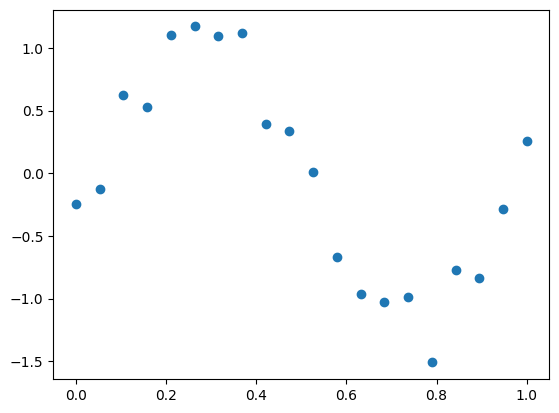

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)

## Fit the Linear model on Training data

In [13]:
x_train.shape

torch.Size([20])

In [14]:
powers = torch.arange(5).float()
y_train.view(-1,1).shape, x_train.unsqueeze(-1).pow(powers).shape

(torch.Size([20, 1]), torch.Size([20, 5]))

In [15]:
powers = torch.arange(5).float()
x_poly = x_train.unsqueeze(-1).pow(powers) ## NxM
w = torch.linalg.pinv(x_poly) @ y_train.view(-1,1) ## MxN * Nx1 == Mx1

In [16]:
w.shape, x_test.shape

(torch.Size([5, 1]), torch.Size([200]))

In [17]:
x_poly_test = x_test.unsqueeze(-1).pow(powers)
y_pred = x_poly_test @ w

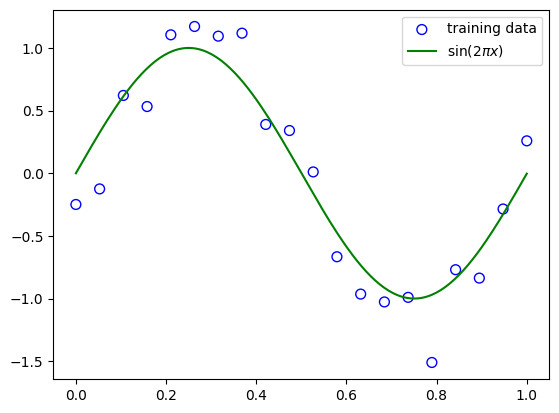

In [18]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()


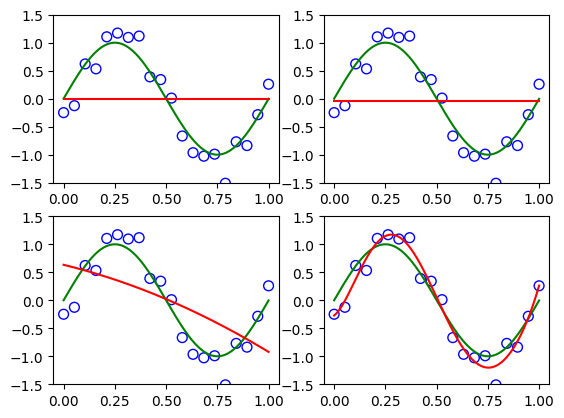

In [19]:
for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1)
    powers = torch.arange(degree).float()
    x_poly = x_train.unsqueeze(-1).pow(powers) ## NxM
    w = torch.linalg.pinv(x_poly) @ y_train.view(-1,1) ## MxN * Nx1 == Mx1
    x_poly_test = x_test.unsqueeze(-1).pow(powers)
    y_pred = x_poly_test @ w    

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y_pred, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))